# 3D Virtual Screening of a list of molecules and a smi file

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from openpharmacophore.screening.screening3D import VirtualScreening3D
from openpharmacophore.pharmacophore import Pharmacophore
from openpharmacophore.pharmacophoric_point import PharmacophoricPoint
from openpharmacophore.structured_based import StructuredBasedPharmacophore 
import pyunitwizard as puw

from rdkit import Chem, RDLogger
RDLogger.DisableLog('rdApp.*')

import time

### Small virtual screening of a list of 5 molecules

In [4]:
elements = [
    PharmacophoricPoint(feat_type="hb acceptor", center=puw.quantity([3.877, 7.014, 1.448], "angstroms"),
                                             radius=puw.quantity(1.0, "angstroms")),
    PharmacophoricPoint(feat_type="hb acceptor", center=puw.quantity([7.22, 11.077, 5.625], "angstroms"),
                                             radius=puw.quantity(1.0, "angstroms")),
    PharmacophoricPoint(feat_type="hb donor", center=puw.quantity([4.778, 8.432, 7.805], "angstroms"),
                                         radius=puw.quantity(1.0, "angstroms")),
    PharmacophoricPoint(feat_type="aromatic ring", center=puw.quantity([1.56433333333334, 7.06399999999999, 3.135], "angstroms"),
                                              radius=puw.quantity(1.0, "angstroms"))
]

pharmacophore = Pharmacophore(elements)
pharmacophore

Pharmacophore(n_elements: 4)

In [5]:
mols = ['Cc1cccc(c2n[nH]cc2c3ccc4ncccc4n3)n1',
      'Cc1cccnc1c2nc(N)sc2c3nc4cccnc4cc3',
      'Cc1cccc(c2[nH]c(CNc5cc(C(=O)N)ccc5)nc2c3ccc4nccnc4c3)n1',
      'Clc1cccc(c2nc(N)sc2c3ccc4ncccc4n3)c1',
      'n1ccccc1c2nn3CCCc3c2c4ccnc5cc(NC(=O)NCCN(C)C)ccc45']

mols = [Chem.MolFromSmiles(mol) for mol in mols]

screener = VirtualScreening3D(pharmacophore)
screener.screen_mol_list(mols, verbose=2)

Couldn't embed molecule 3


In [6]:
screener.print_report()

Virtual Screening Results
-------------------------

Molecules scanned:                                    5
Molecules matched to pharmacophore:                   4
Molecules that didn't match the pharmacophore:        1
Lowest  SSD value:     4.7041
Highest SSD value:     6.3572
Average SSD value:     5.5803

Top 4 molecules:

   ID            SSD
-------       ------
None          4.7041
None          5.3688
None           5.891
None          6.3572



### Virtual screening of a .smi file with a pharmer pharmacophore for PDB 1M70

In [7]:
sb_pharmacophore = StructuredBasedPharmacophore().from_file("../../data/Pharmacophores/pharmer/1M70.json")
sb_pharmacophore

StructuredBasedPharmacophore(n_elements: 5)

In [8]:
file = "../../data/Databases/zinc/AAAA.smi"
sb_screener = VirtualScreening3D(sb_pharmacophore)
sb_screener.screen_db_from_dir(file)

File scanned!


In [9]:
sb_screener.print_report()

Virtual Screening Results
-------------------------

Molecules scanned:                                4,166
Molecules matched to pharmacophore:                   1
Molecules that didn't match the pharmacophore:    4,165
Lowest  SSD value:    10.7087
Highest SSD value:    10.7087
Average SSD value:    10.7087

Top 1 molecules:

   ID            SSD
-------       ------
895081       10.7087



In [10]:
print(sb_screener.aligned_mols)

[(10.708703676691911, '895081', <rdkit.Chem.rdchem.Mol object at 0x7fb6c025b3f0>)]


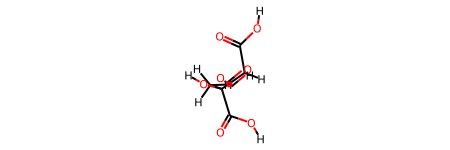

In [11]:
matched_mol = sb_screener.aligned_mols[0][-1]
matched_mol